In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
wider_19p0 = np.load('Run_040118/bolp_19p0_um_0_wider.npz')

In [3]:
wider_19p0.files

['i', 'func_all', 'param']

In [4]:
Npert = 5000

In [5]:
p0_19p0 = np.array((1.04029,12.80315,0.51193,10.25010,11.64354,0.,0.))
dp_range = np.array((0.11,0.4,0.225,0.9,0.2,1.,1.))

In [11]:
def fit_cutout_derivative(param,func,p0,ip,jf,n,plot=0):
    p_75 = np.percentile(param,75)
    p_25 = np.percentile(param,25)
    mask = np.logical_or(param>p_75,param<p_25)
    a,b = np.polyfit(param[mask],func[mask],1)
    if plot:
        plt.figure()
        plt.plot(param[mask],func[mask],'b.',alpha=0.1)
        prange = np.linspace(min(param),max(param),100)
        plt.plot(prange,a*prange+b,'r-')
        plt.axvline(p0,linestyle=':',color='grey')
        plt.title(a)
        plt.savefig(str('Run_040118/bolp19p0_cutout_test'+'/p{}f{}_{}').format(ip,jf,n))
        plt.close()
    return a

In [8]:
cutout_deriv = np.zeros((7,160,100))

In [12]:
for i in range(7):
    param = wider_19p0['param'][i*Npert:i*Npert+Npert,i]
    func = wider_19p0['func_all'][i*Npert:i*Npert+Npert]
    p0 = p0_19p0[i]
    for j in range(160):
        print j
        funcj = func[:,j]
        for n in range(100):
            idx = np.random.choice(5000,(50+50*n),replace=0)
            cutout_deriv[i,j,n] = fit_cutout_derivative(param[idx],funcj[idx],p0,i,j,n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144


In [58]:
for i in range(7):
    for j in range(160):
        plt.figure()
        plt.plot(np.arange(1,101)*50,cutout_deriv[i,j]/cutout_deriv[i,j,-1])
        plt.axhline(1,linestyle=':',color='grey')
        plt.ylim((0,2))
        plt.savefig(str('Run_040118/bolp19p0_cutout_test'+'/p{}f{}').format(i,j))
        plt.close()

In [32]:
for i in range(7):
    param = wider_19p0['param'][i*Npert:i*Npert+Npert,i]
    func = wider_19p0['func_all'][i*Npert:i*Npert+Npert]
    p0 = p0_19p0[i]
    for j in range(160):
        funcj = func[:,j]
        fit_cutout_derivative(param,funcj,p0,i,j,'all',plot=1)

In [33]:
import halotools

from halotools.sim_manager import CachedHaloCatalog

halocat = CachedHaloCatalog(simname='bolplanck',version_name='halotools_v0p4',redshift=0,halo_finder='rockstar')

from HOD_models import decorated_hod_model


model = decorated_hod_model()

model.populate_mock(halocat)

In [34]:
param_names = ('alpha','logM1','sigma_logM','logM0','logMmin','mean_occupation_centrals_assembias_param1','mean_occupation_satellites_assembias_param1')

In [35]:
p_for_ngal = np.zeros((7,51))
ngal = np.zeros((7,51))
for i in range(7):
    print i
    p = p0_19p0*1.
    for j in range(51):
        p[i] = p0_19p0[i]-dp_range[i]+j*dp_range[i]/25.
        print j
        p_for_ngal[i,j] = p[i]
        model.param_dict.update(dict(zip(param_names, p)))
        ngal[i,j] = ((np.sum(model.mean_occupation_centrals(table=model.mock.halo_table))+\
                np.sum(model.mean_occupation_satellites(table=model.mock.halo_table)))/(250.**3))

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


0.00135707278377 0.00135189494776 1.00383005797
-0.0144674713058 -0.0130669202082 1.10718295324
0.0104226203586 0.0108792633322 0.958026296476
-0.000473367326354 -0.000404728857119 1.16959124122
-0.0234234479492 -0.0231369196988 1.01238402752
-2.05868826904e-06 -2.93584515676e-06 0.701225084813
6.45660486146e-05 6.38123888539e-05 1.01181055551


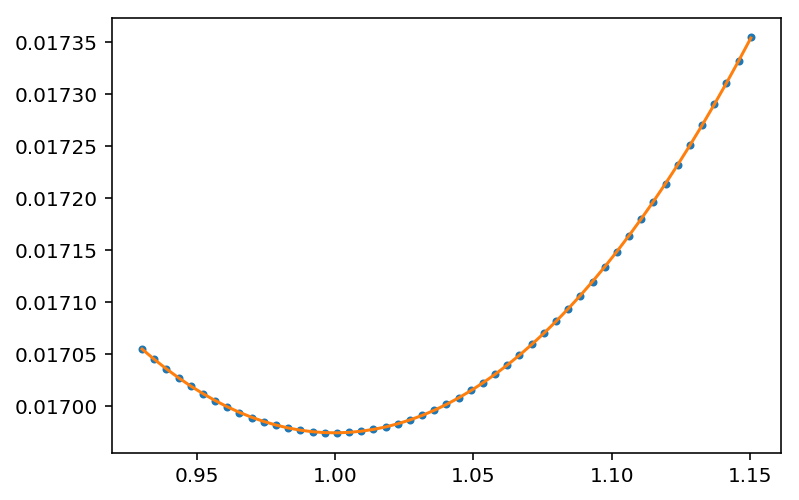

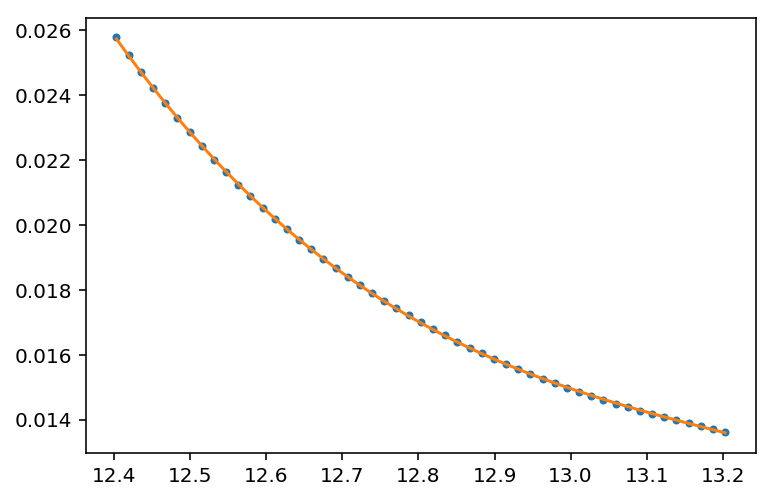

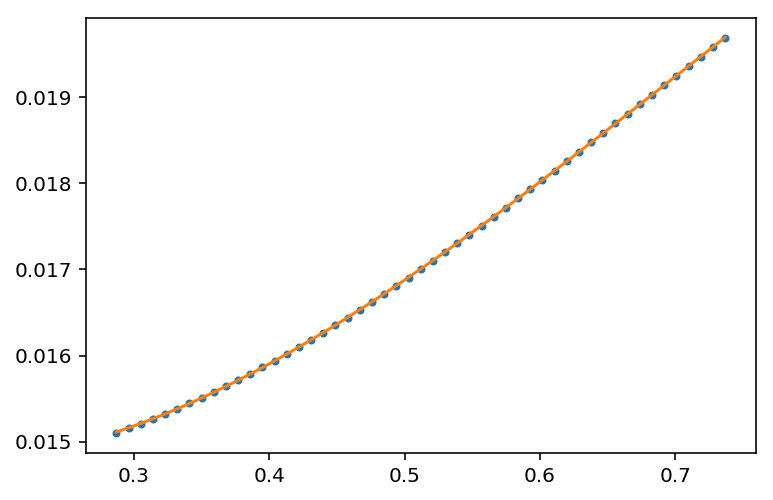

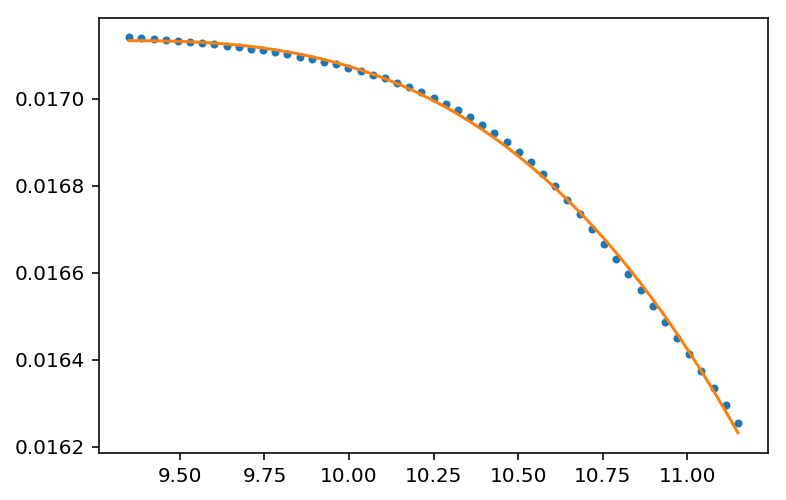

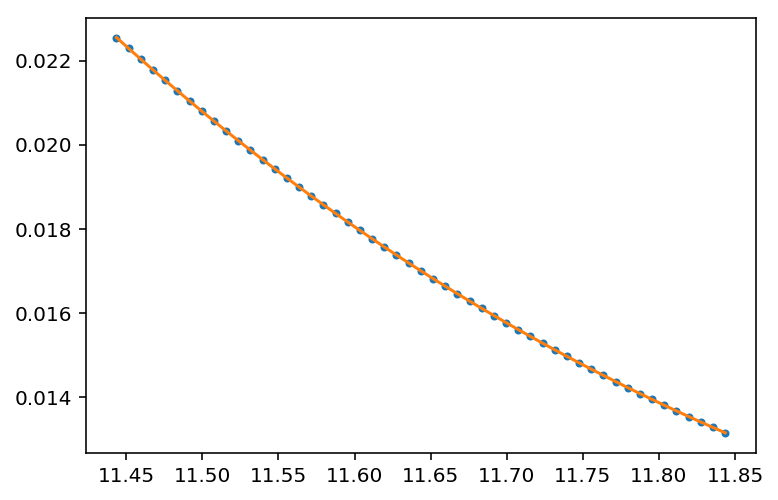

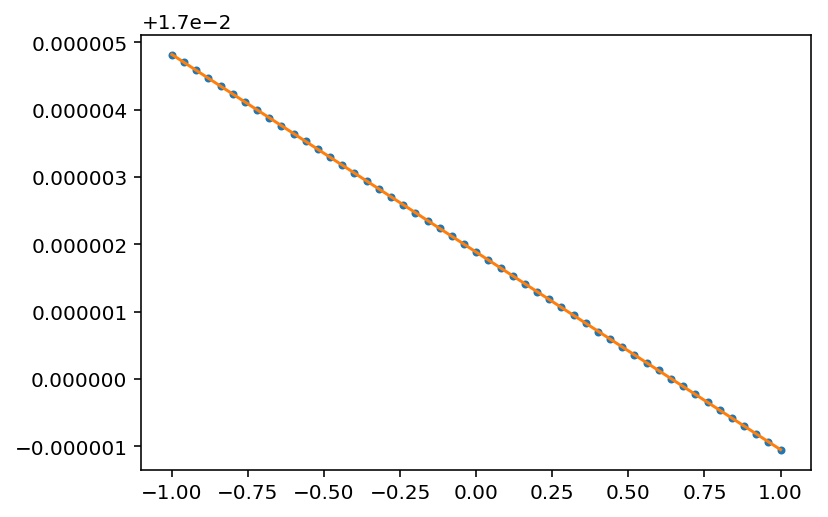

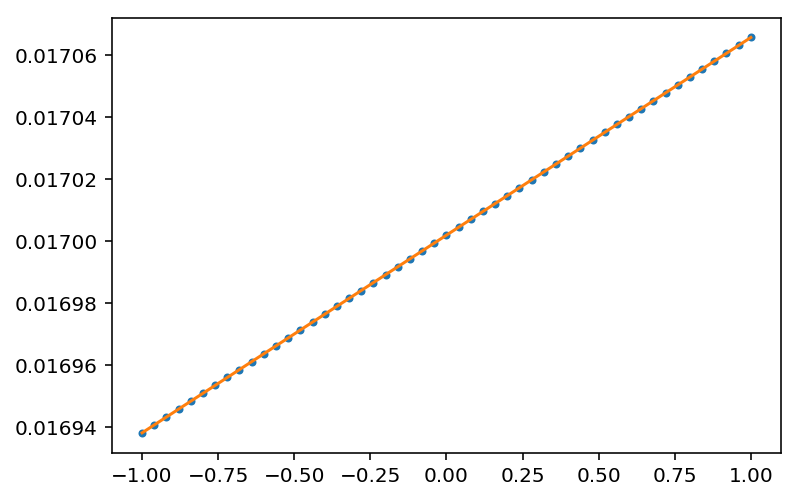

In [36]:
for i in range(7):
    plt.figure()
    plt.plot(p_for_ngal[i],ngal[i],'.')
    a,b,c,d = np.polyfit(p_for_ngal[i],ngal[i],3)
    dngal_dp = 3*a*p0_19p0[i]**2+2*b*p0_19p0[i]+c
    plt.plot(p_for_ngal[i],poly(p_for_ngal[i],a,b,c,d))
    print cutout_deriv[i,0,-1],dngal_dp,cutout_deriv[i,0,-1]/dngal_dp

In [37]:
def calc_cov(covjk,func_real):
    return np.mean(covjk,axis=0)+np.cov(func_real.T)

In [38]:
def calc_fisher(dfdp, covtot):
    fmatrix = np.zeros((7,7))
    for i in range(7):
        for j in range(7):
            fmatrix[i,j] = np.dot(dfdp[i],np.dot(np.linalg.inv(covtot),dfdp[j]))
    return fmatrix

In [39]:
def calc_1sigma(fisher):
    return np.sqrt(np.linalg.inv(fisher).diagonal())

In [40]:
cutout_deriv[5,0,:] = 0

cutout_deriv[6,0,:] = 0

In [41]:
fid_19p0 = np.load('Run_040118/bolp_19p0_0.npz')

In [42]:
calc_1sigma(calc_fisher(cutout_deriv[:,:,-1],calc_cov(fid_19p0['func_all_cov'],fid_19p0['func_all'])))

array([ 0.01186024,  0.01449467,  0.03997447,  1.19967676,  0.02613746,
        0.11524363,  0.13802554])

In [43]:
one_sigma = np.zeros((50,7))
cov = calc_cov(fid_19p0['func_all_cov'],fid_19p0['func_all'])
for i in range(50):
    print i
    one_sigma[i] = calc_1sigma(calc_fisher(cutout_deriv[:,:,i*2+1],cov))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


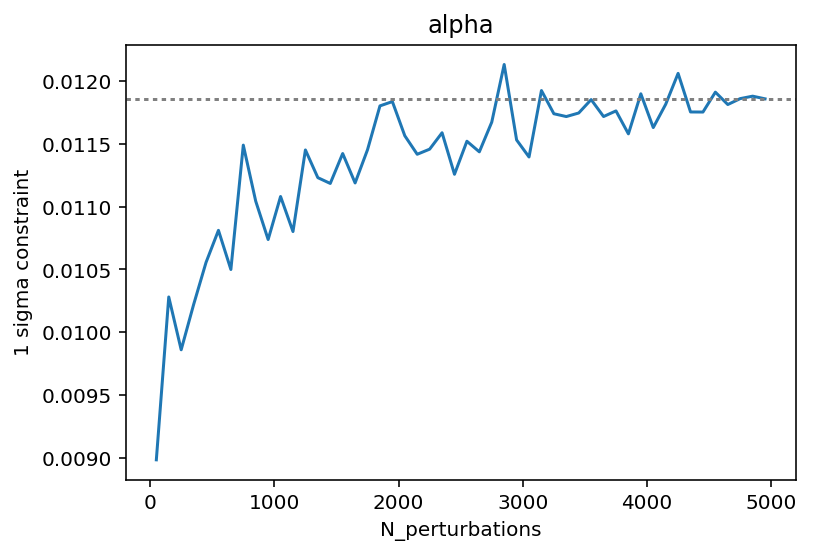

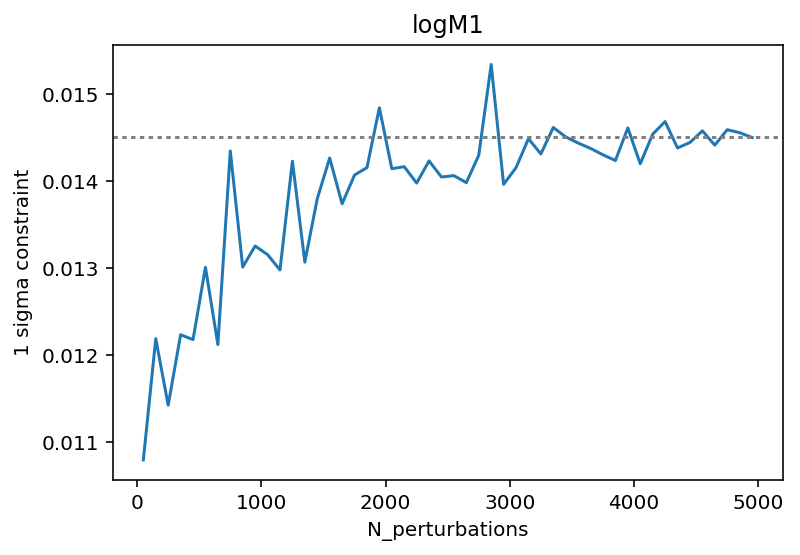

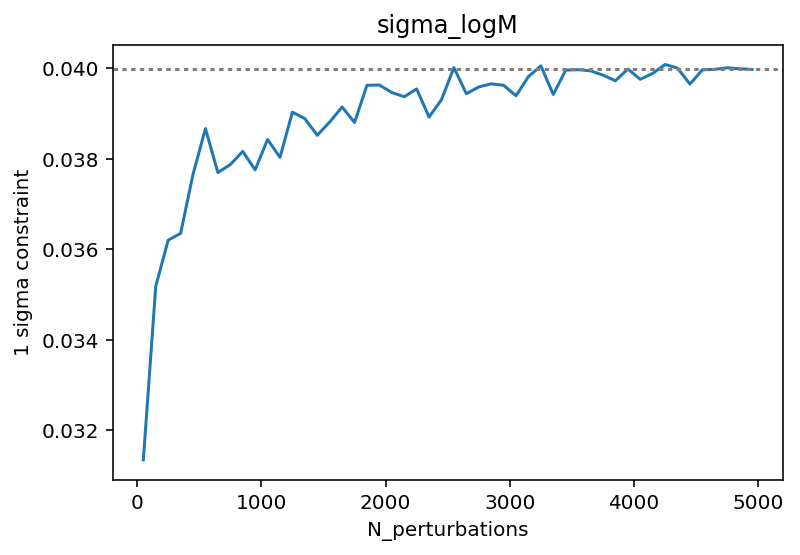

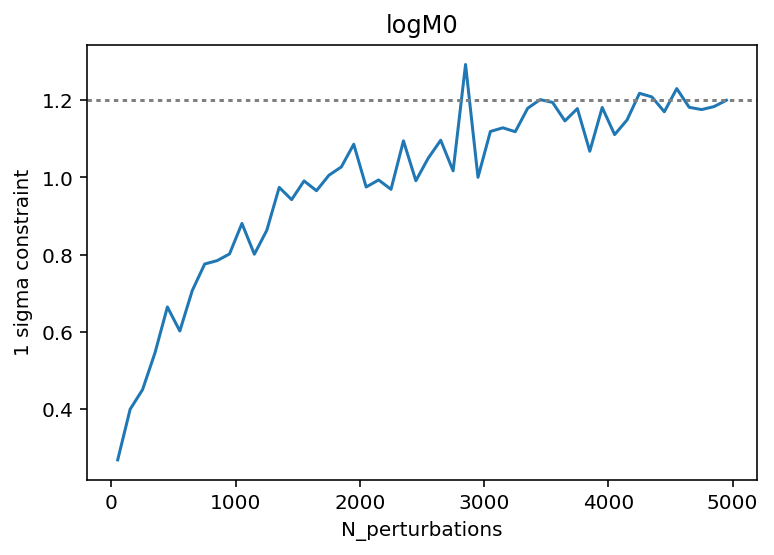

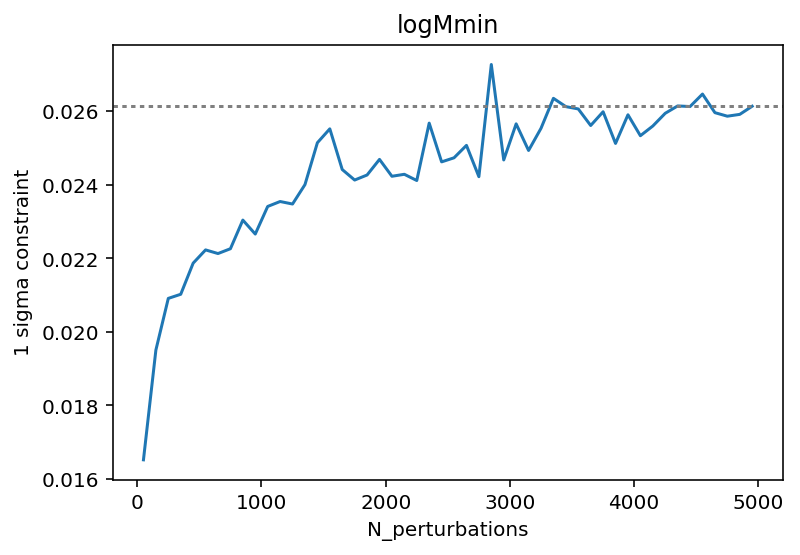

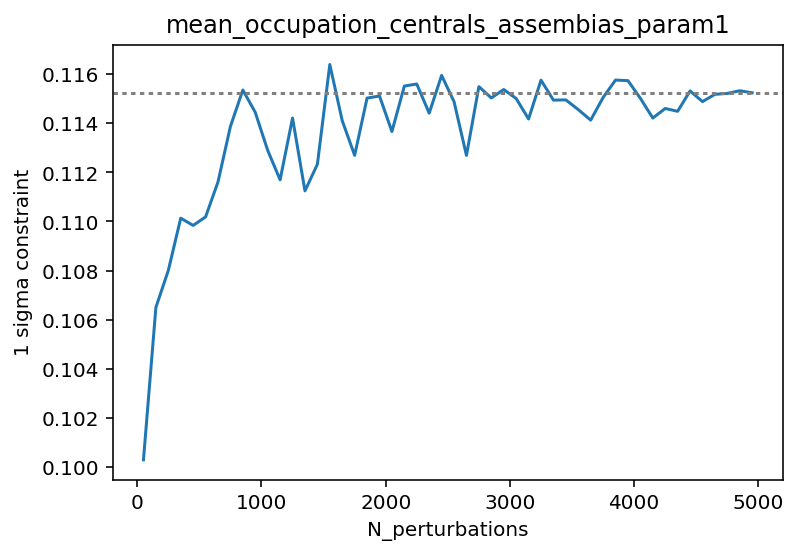

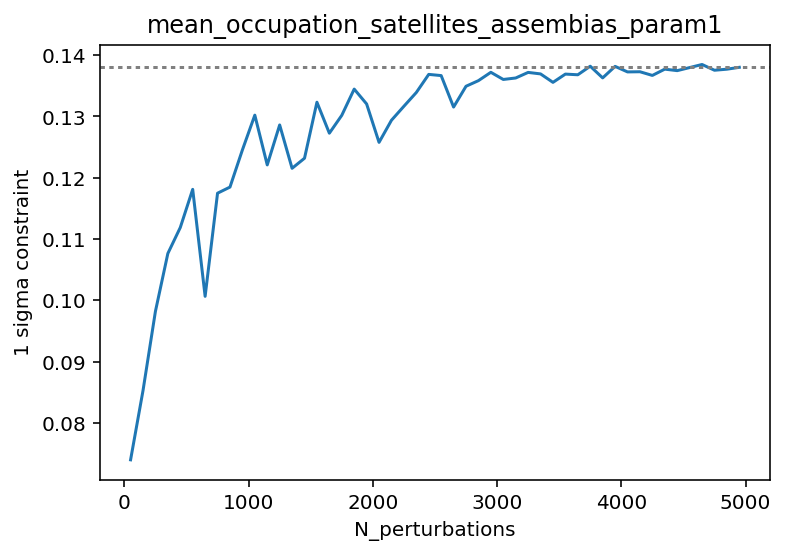

In [44]:
for i in range(7):
    plt.figure()
    plt.title(param_names[i])
    plt.xlabel('N_perturbations')
    plt.ylabel('1 sigma constraint')
    plt.plot(np.arange(50)*100+50,one_sigma[:,i])
    plt.axhline(one_sigma[-1,i],linestyle=':',color='grey')

In [121]:
suspects = np.array(((0,120),(2,155),(2,156),(2,157),(2,158),(2,159),\
         (3,97),(3,98),(3,134),(3,135),(3,136),(3,138),(3,139),\
         (3,141),(3,142),(3,143),(3,144),(3,145),(3,146),(3,147),\
         (3,148),(3,149),(3,150),(3,151),(3,152),(3,154),(3,155),\
         (3,156),(3,157),(3,158),(3,159),(5,0),(5,34),(5,37),(5,38),\
         (5,39),(5,40),(5,89),(5,106),(6,28),(6,29),(6,60),(6,61),\
         (6,62),(6,63),(6,64),(6,65),(6,66),(6,67),(6,68),(6,69),\
         (6,87),(6,88),(6,89),(6,101),(6,105),(6,106),(6,107),\
         (6,108),(6,109),(6,110),(6,137),(6,138),(6,139),(6,140),\
         (6,141),(6,142),(6,143),(6,145),(6,146),(6,147),(6,148),\
         (6,150),(6,151),(6,152),(6,153),(6,154),(6,155),(6,156),(6,157),(6,158)))

KeyboardInterrupt: 

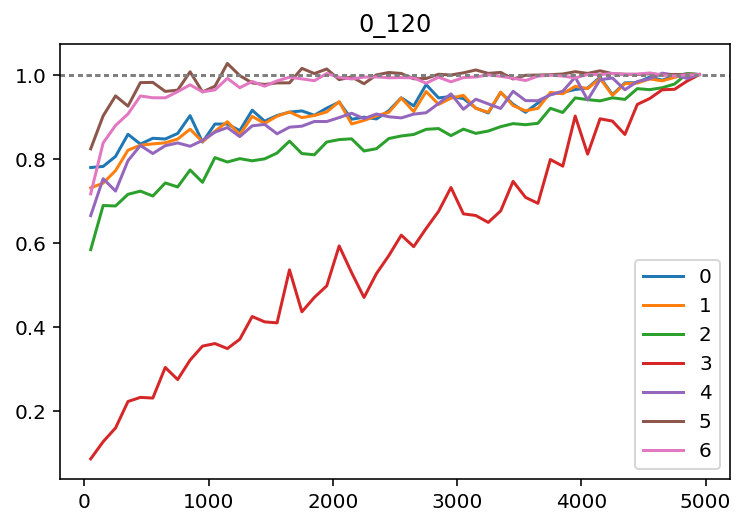

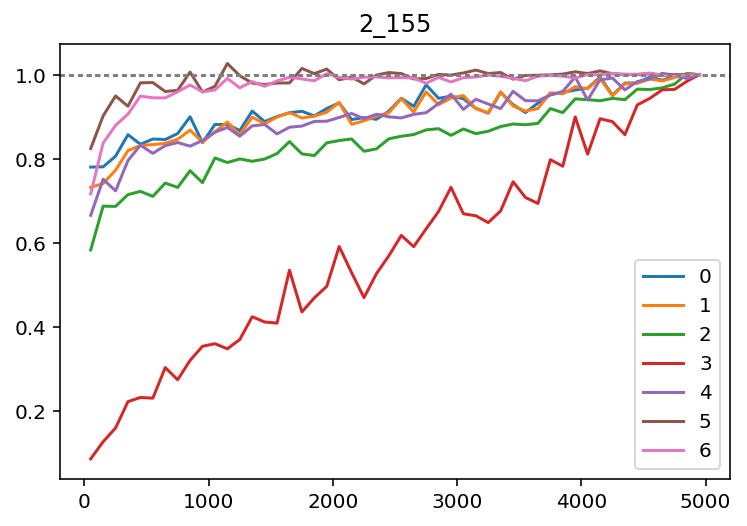

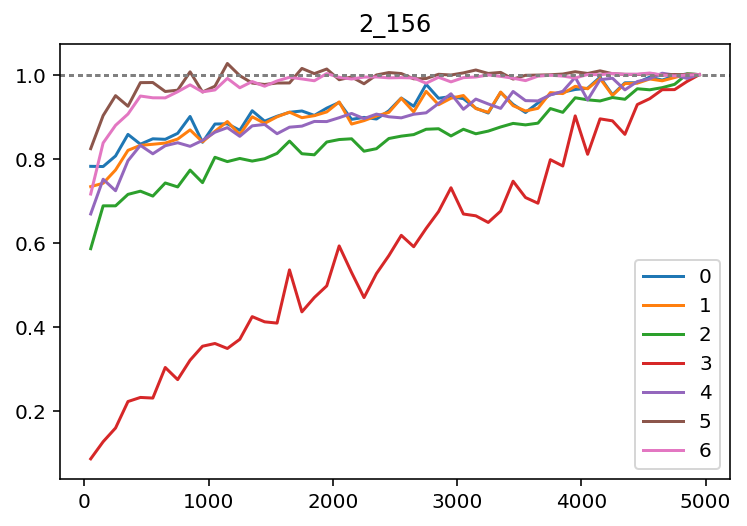

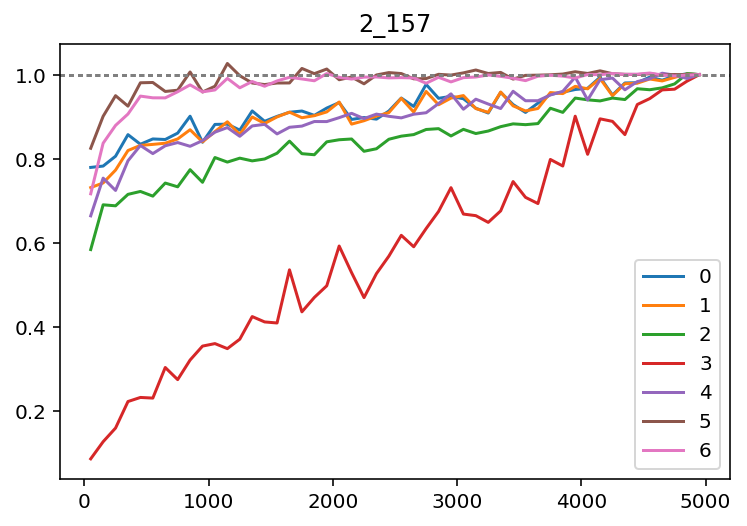

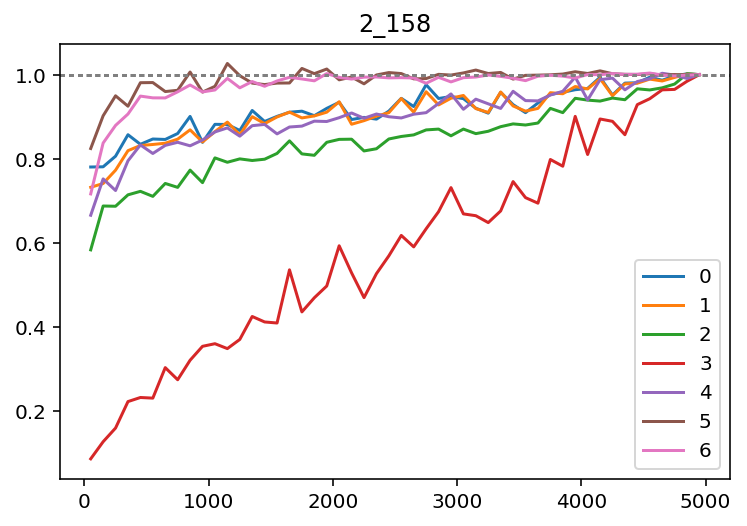

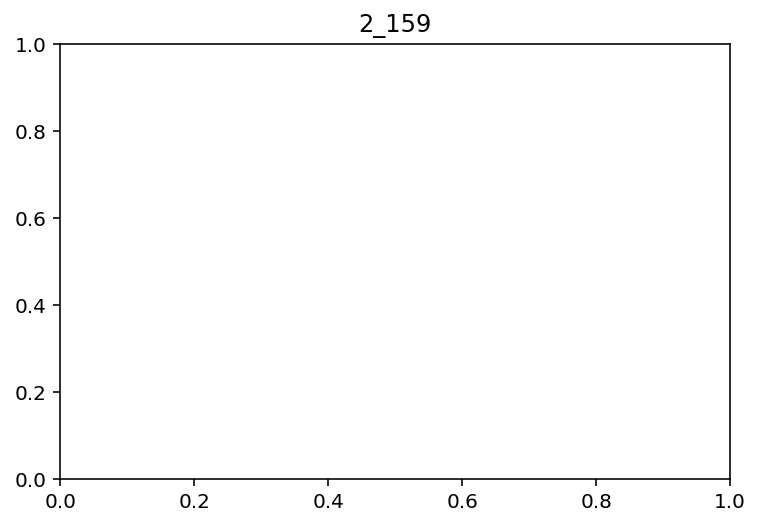

In [122]:
for i,j in suspects:
    one_sigma_ij = np.zeros((50,7))
    plt.figure()
    plt.title(str(i)+'_'+str(j))
    for k in range(50):
        deriv = 1.*poly_deriv[:,:,k*2+1]
        deriv[i,j] = 0
        one_sigma_ij[k] = calc_1sigma(calc_fisher(deriv,cov))
    for l in range(7):
        plt.plot(np.arange(50)*100+50,one_sigma_ij[:,l]/one_sigma_ij[-1,l],label = l)
        plt.legend()
        plt.axhline(1,linestyle=':',color='grey')

In [45]:
def calc_1sigma_prior(fisher,prior_i,prior_inv_s2):
    fisher[prior_i,prior_i] += prior_inv_s2
    return np.sqrt(np.linalg.inv(fisher).diagonal())

In [46]:
one_sigma_pp = np.zeros((50,7))
for i in range(50):
    print i
    one_sigma_pp[i] = calc_1sigma_prior(calc_fisher(cutout_deriv[:,:,i*2+1],cov),3,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


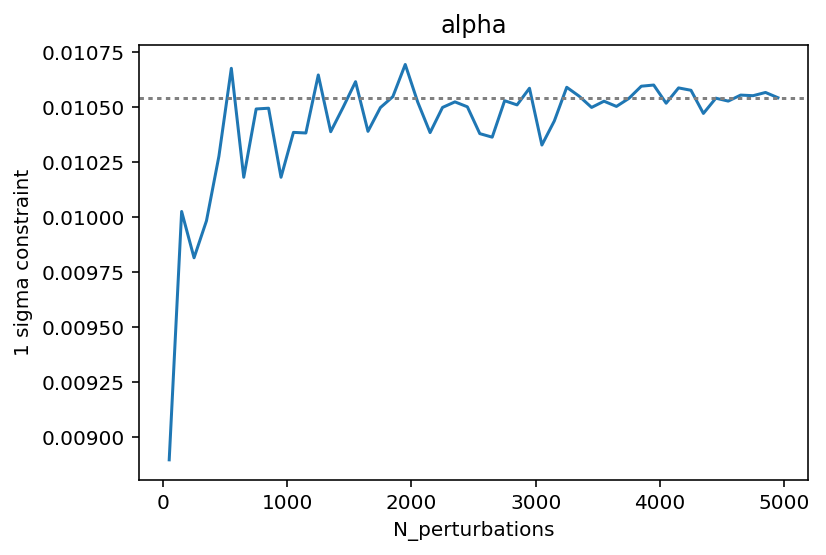

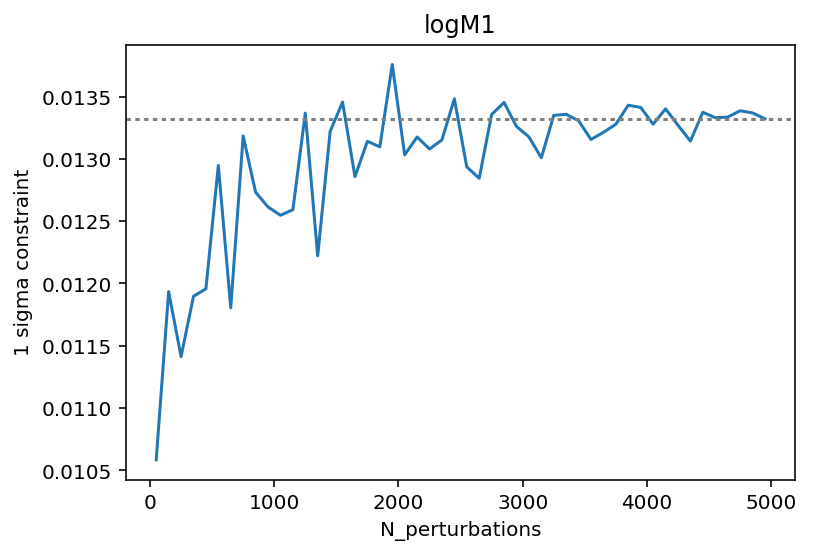

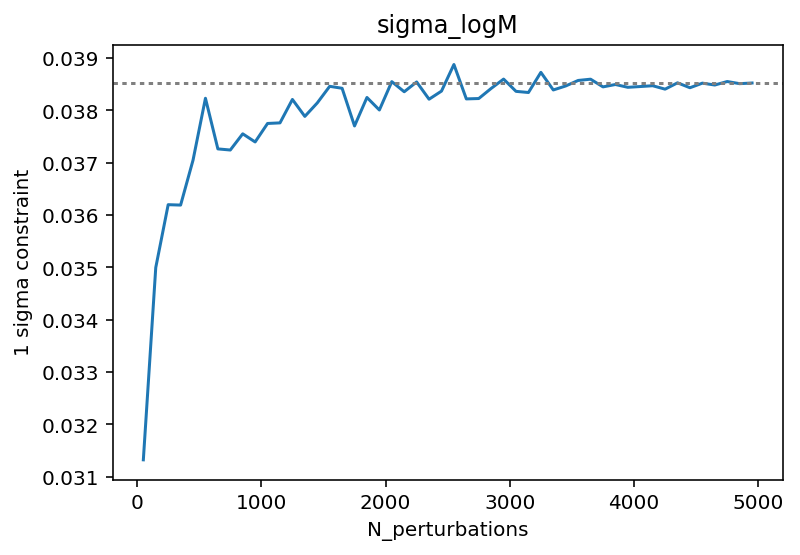

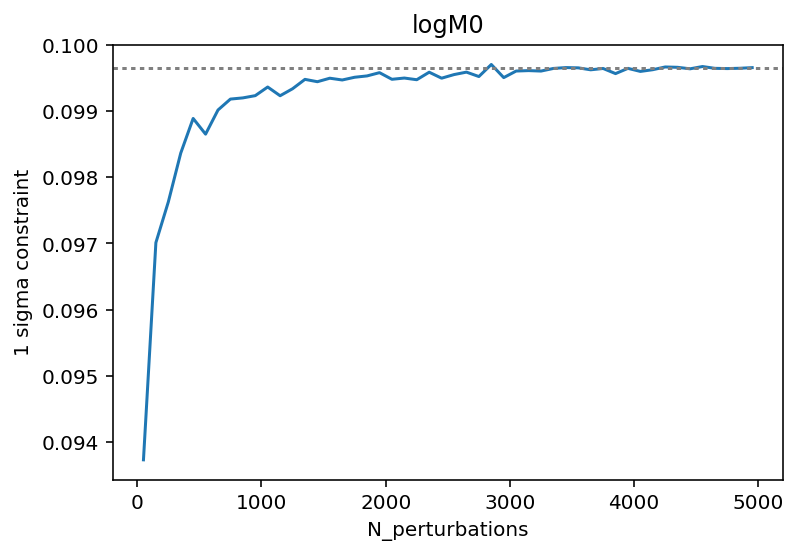

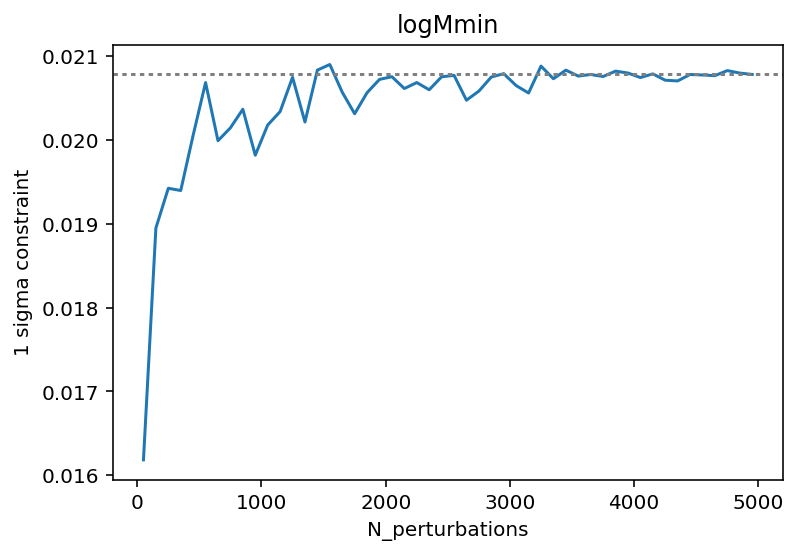

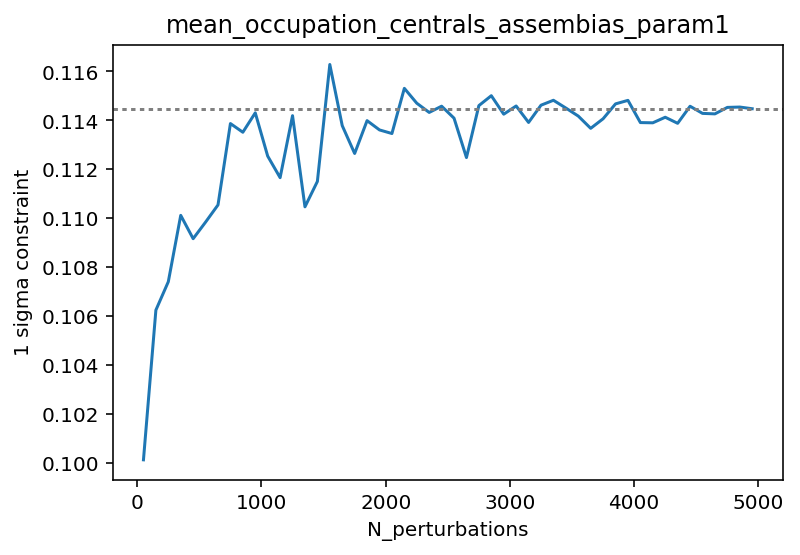

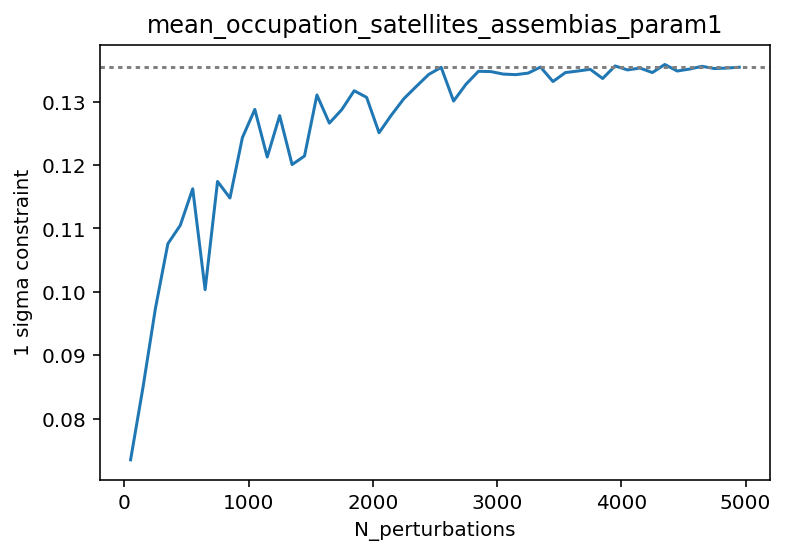

In [47]:
for i in range(7):
    plt.figure()
    plt.title(param_names[i])
    plt.xlabel('N_perturbations')
    plt.ylabel('1 sigma constraint')
    plt.plot(np.arange(50)*100+50,one_sigma_pp[:,i])
    plt.axhline(one_sigma_pp[-1,i],linestyle=':',color='grey')

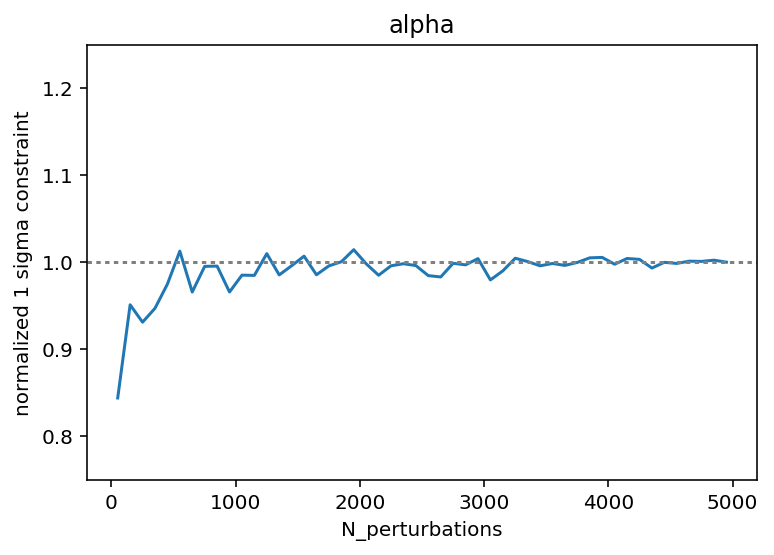

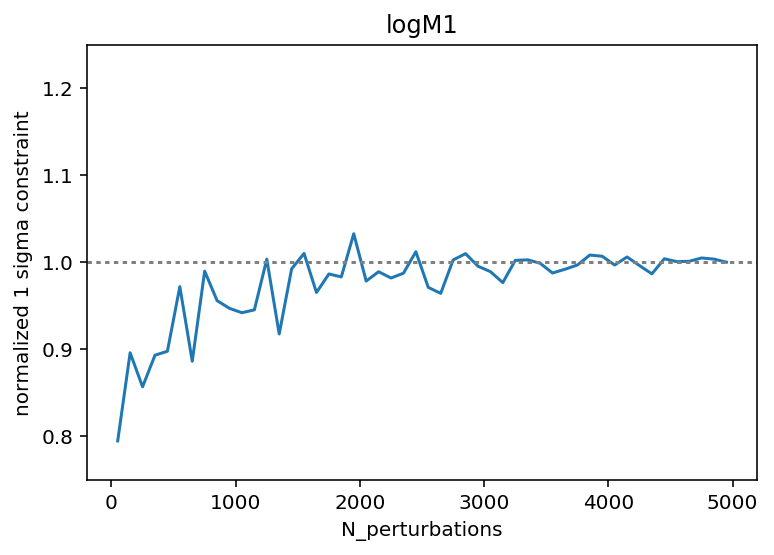

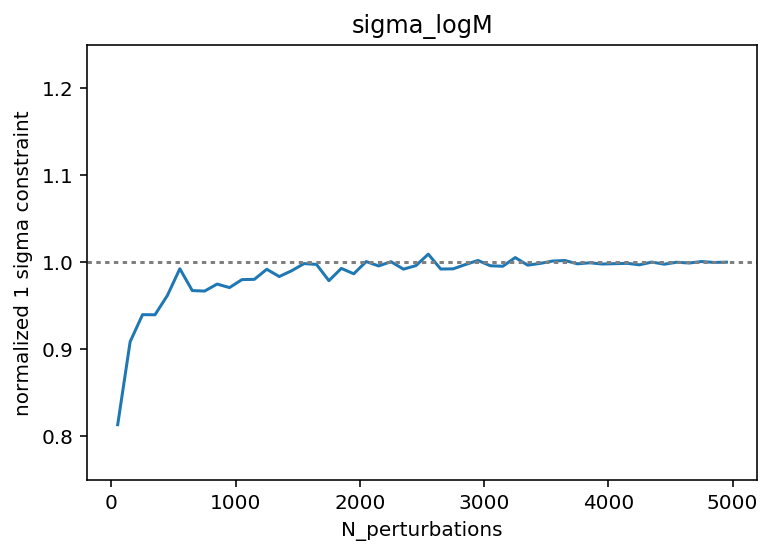

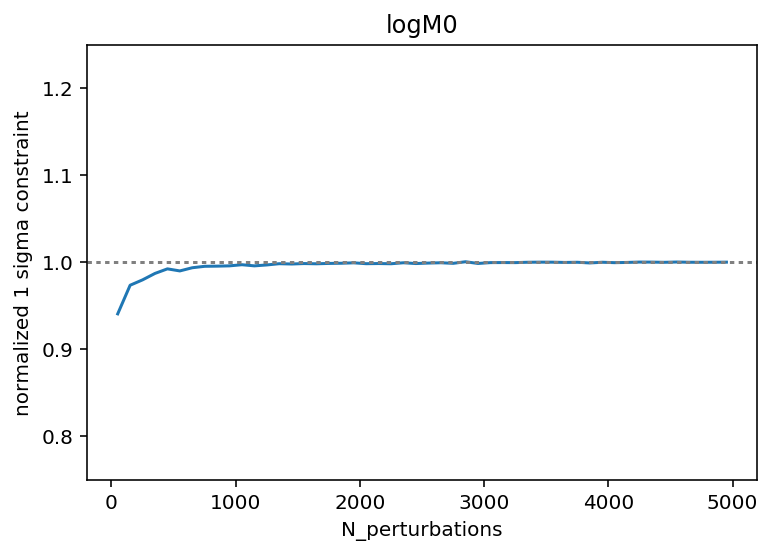

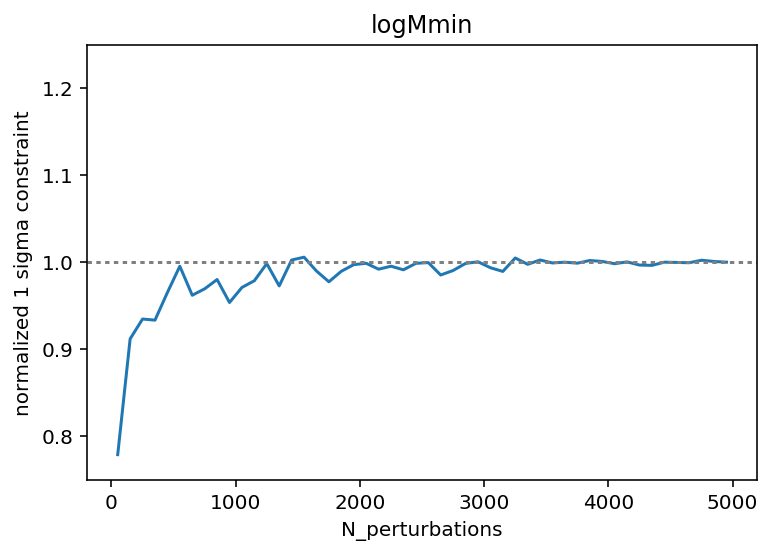

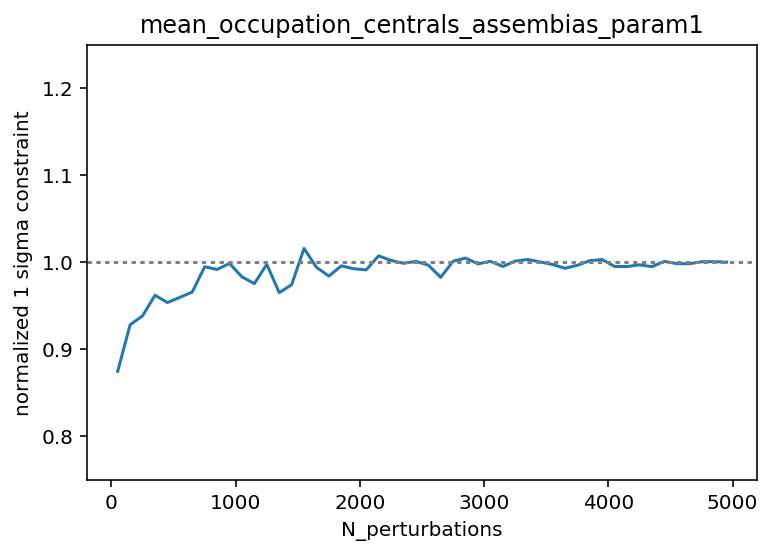

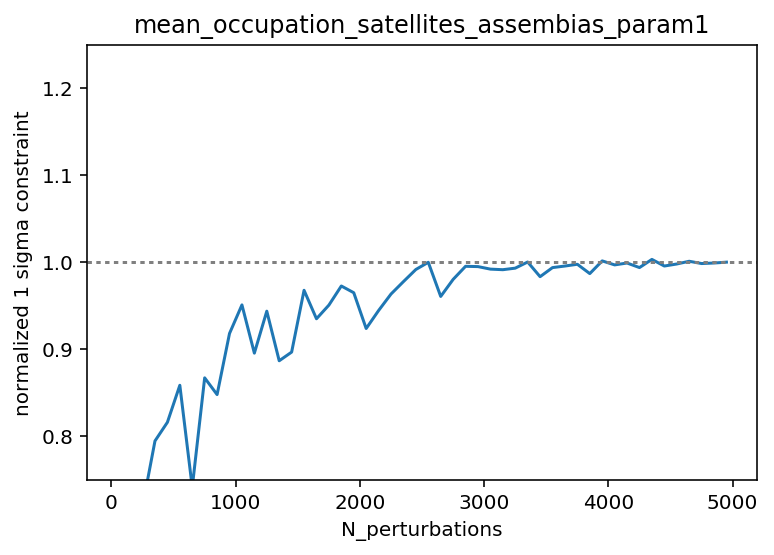

In [48]:
for i in range(7):
    plt.figure()
    plt.title(param_names[i])
    plt.xlabel('N_perturbations')
    plt.ylabel('normalized 1 sigma constraint')
    plt.plot(np.arange(50)*100+50,one_sigma_pp[:,i]/one_sigma_pp[-1,i])
    plt.axhline(1,linestyle=':',color='grey')
    plt.ylim((0.75,1.25))

In [49]:
one_sigma_pp_wp = np.zeros((50,7))
for i in range(50):
    print i
    one_sigma_pp_wp[i] = calc_1sigma_prior(calc_fisher(cutout_deriv[:,:30,i*2+1],cov[:30,:30]),3,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [50]:
one_sigma_pp_wp[-1]

array([ 0.03576489,  0.04671035,  0.64888238,  0.09997743,  0.30893764,
        0.60431774,  0.35422143])

## wp only

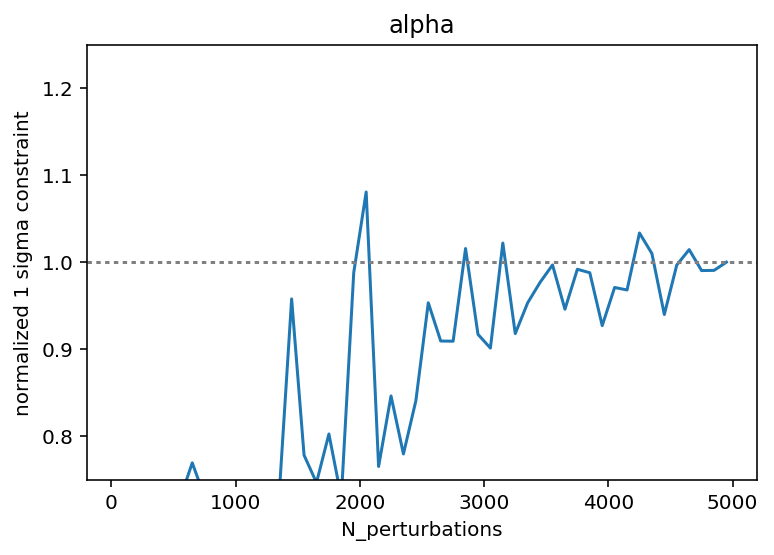

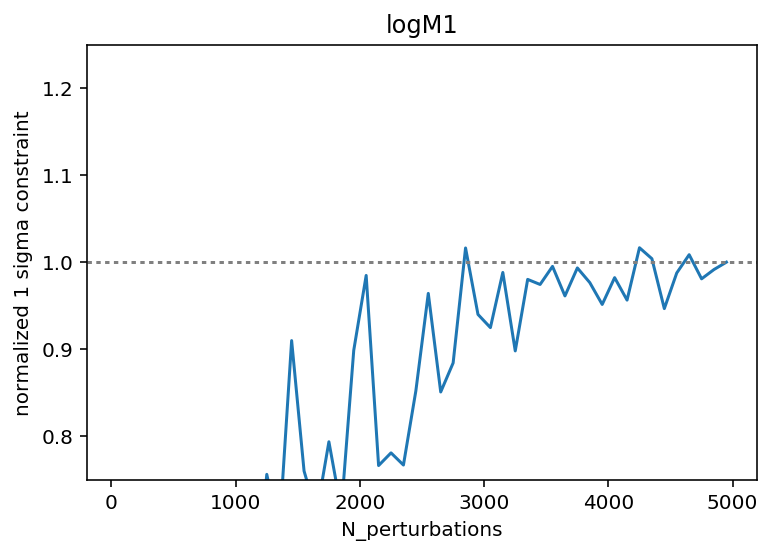

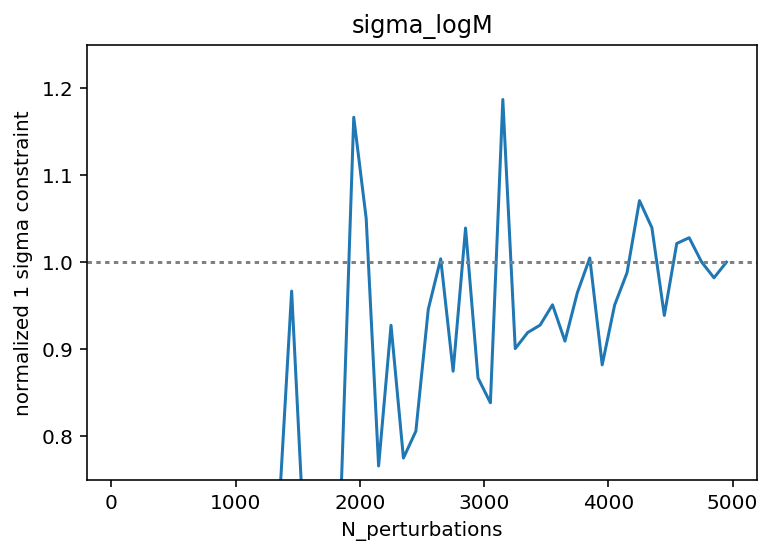

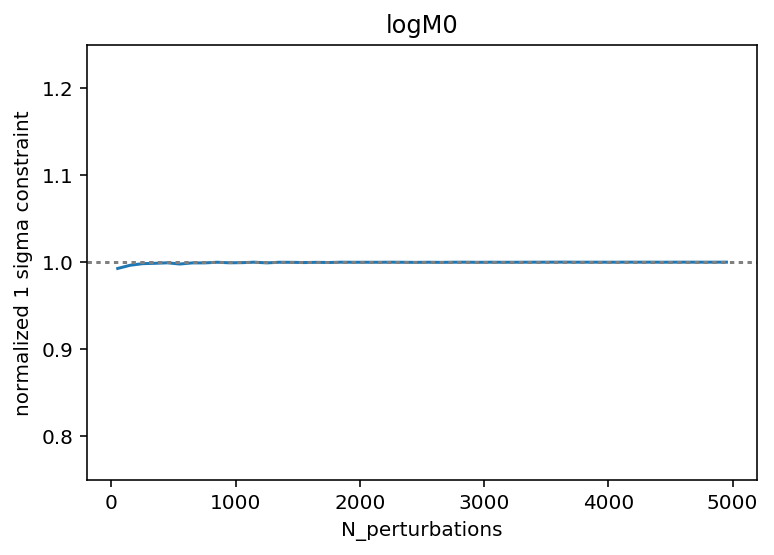

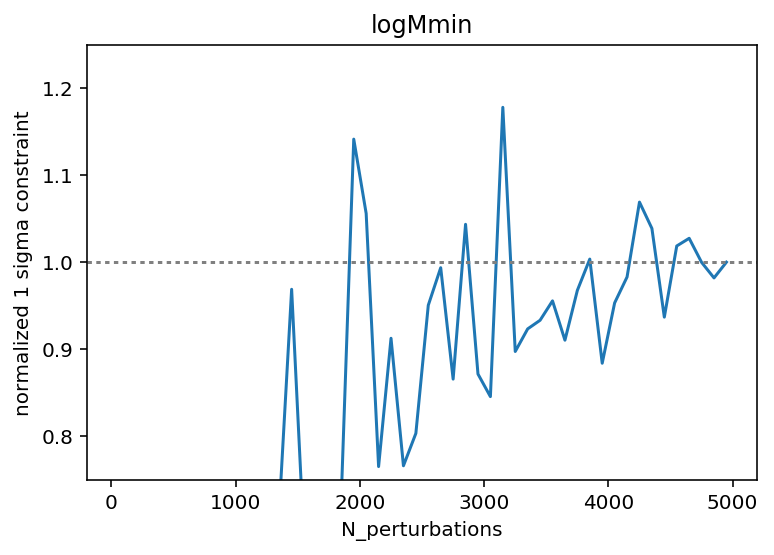

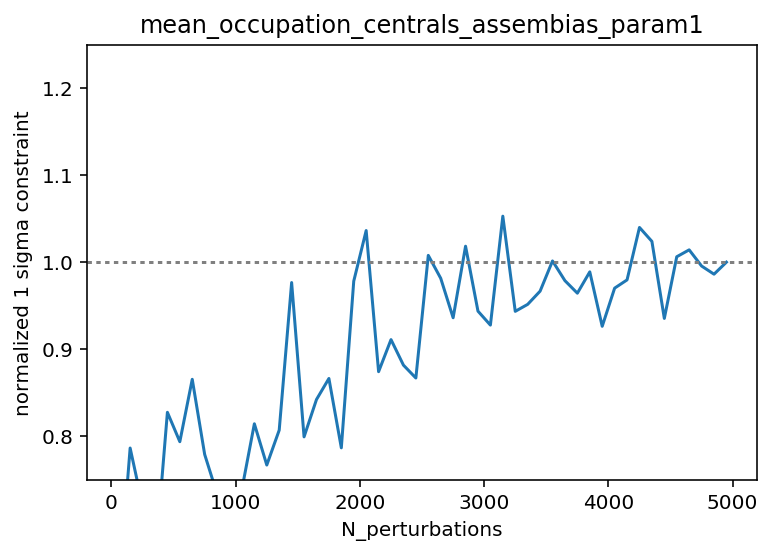

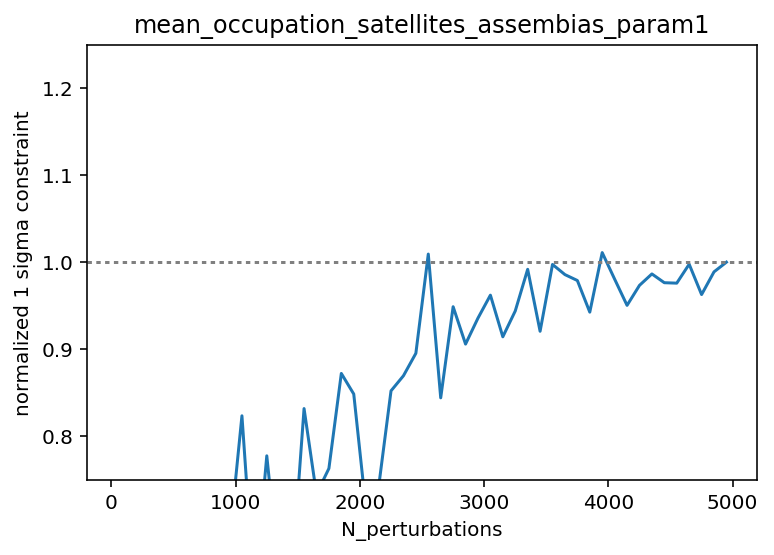

In [51]:
for i in range(7):
    plt.figure()
    plt.title(param_names[i])
    plt.xlabel('N_perturbations')
    plt.ylabel('normalized 1 sigma constraint')
    plt.plot(np.arange(50)*100+50,one_sigma_pp_wp[:,i]/one_sigma_pp_wp[-1,i])
    plt.axhline(1,linestyle=':',color='grey')
    plt.ylim((0.75,1.25))

In [52]:
one_sigma_pp_ds = np.zeros((50,7))
for i in range(50):
    print i
    one_sigma_pp_ds[i] = calc_1sigma_prior(calc_fisher(cutout_deriv[:,30:60,i*2+1],cov[30:60,30:60]),3,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


## delta sigma only

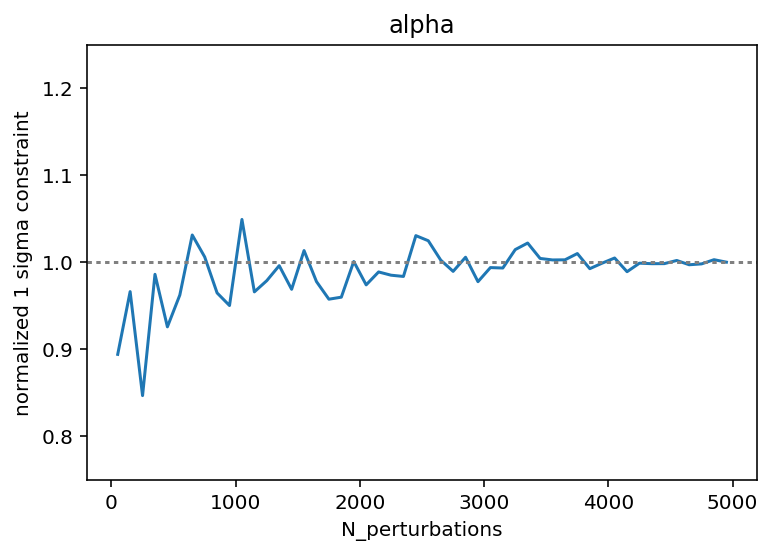

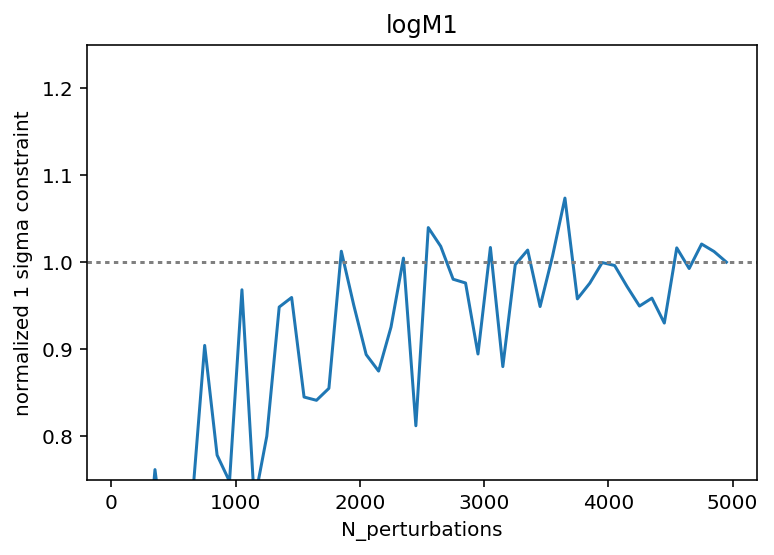

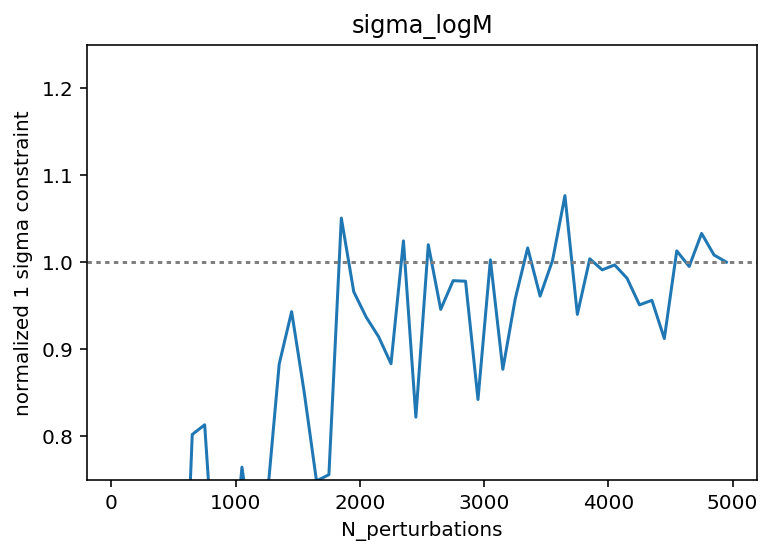

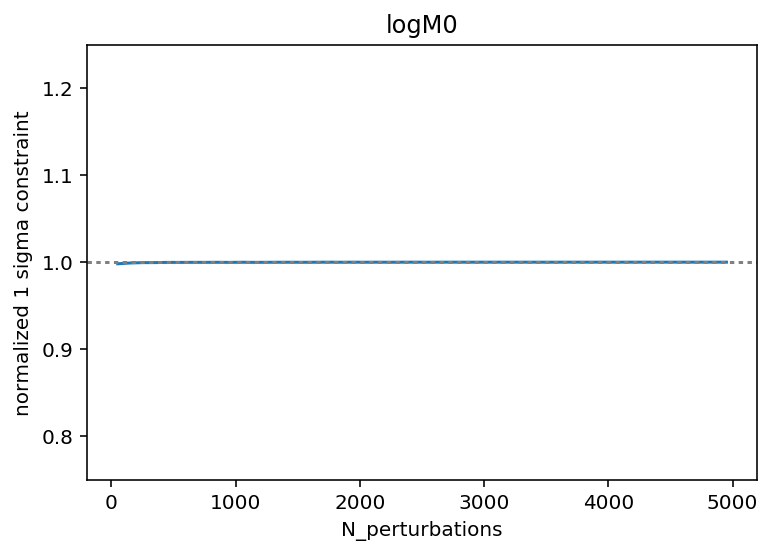

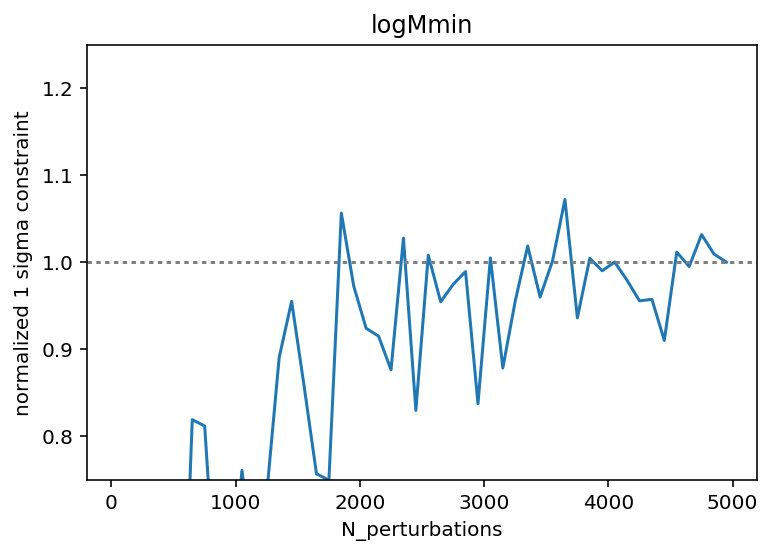

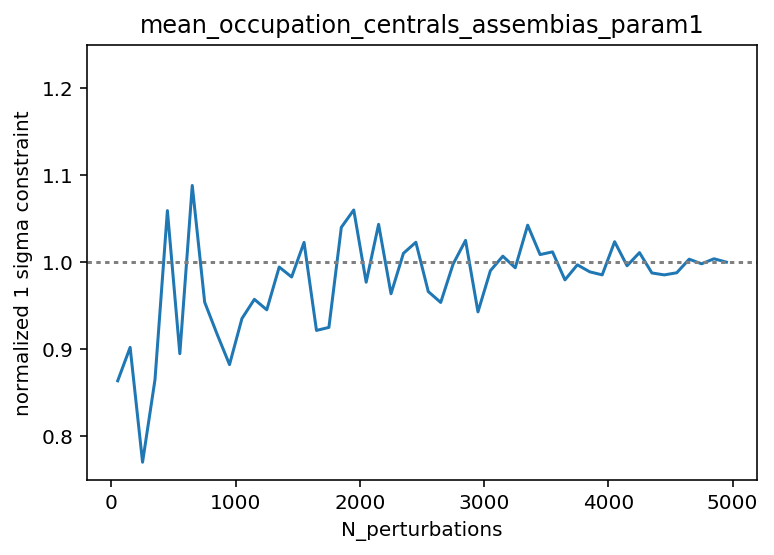

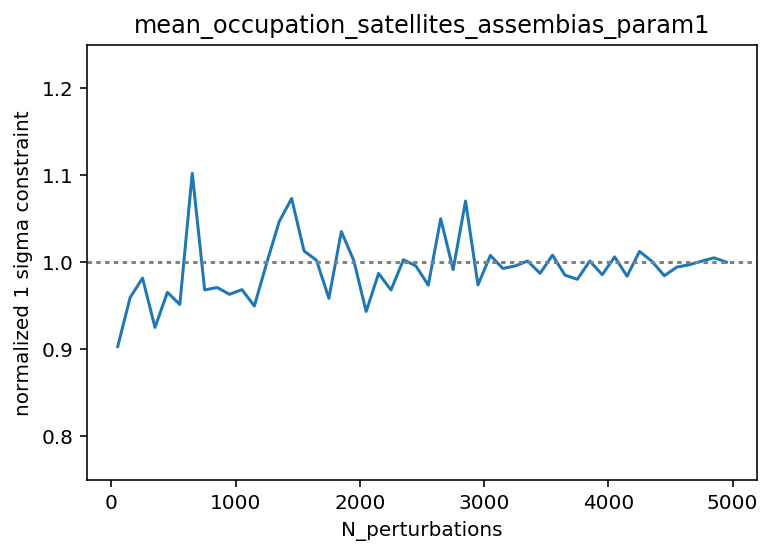

In [53]:
for i in range(7):
    plt.figure()
    plt.title(param_names[i])
    plt.xlabel('N_perturbations')
    plt.ylabel('normalized 1 sigma constraint')
    plt.plot(np.arange(50)*100+50,one_sigma_pp_ds[:,i]/one_sigma_pp_ds[-1,i])
    plt.axhline(1,linestyle=':',color='grey')
    plt.ylim((0.75,1.25))

In [54]:
one_sigma_pp_vpf = np.zeros((50,7))
for i in range(50):
    print i
    one_sigma_pp_vpf[i] = calc_1sigma_prior(calc_fisher(cutout_deriv[:,60:90,i*2+1],cov[60:90,60:90]),3,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


## vpf only

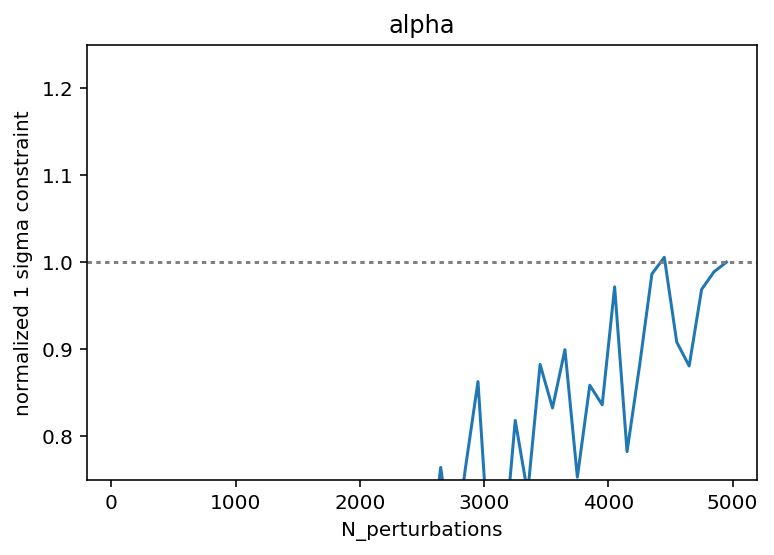

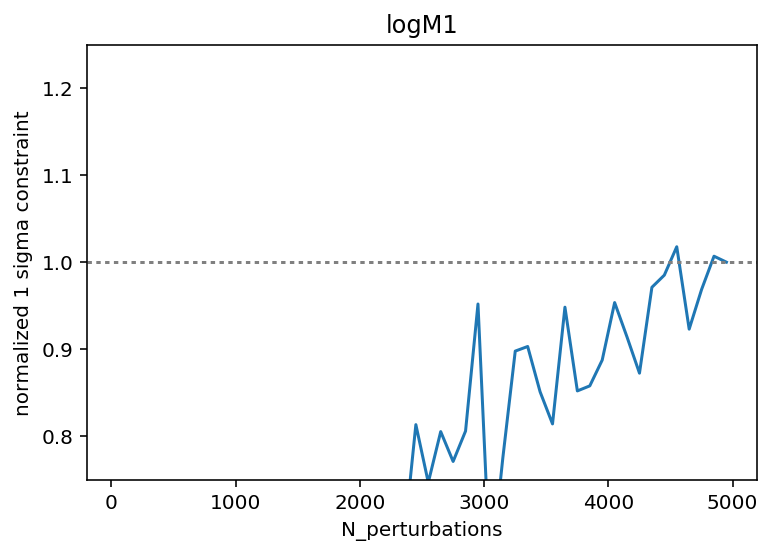

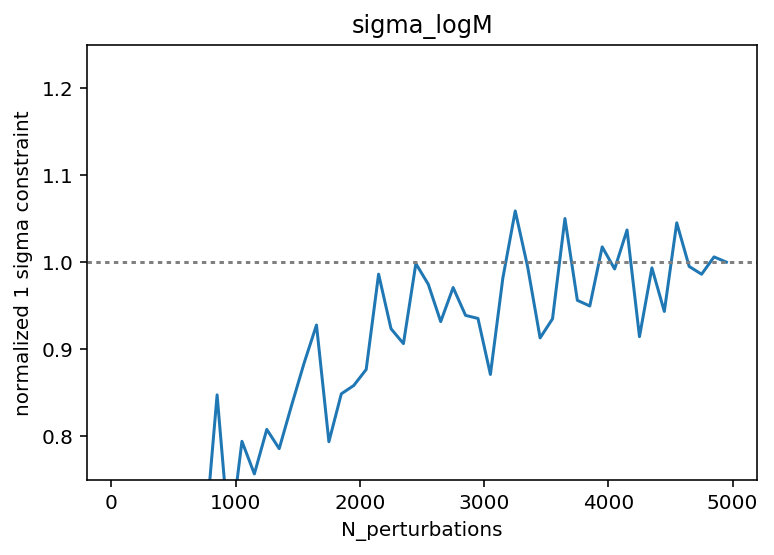

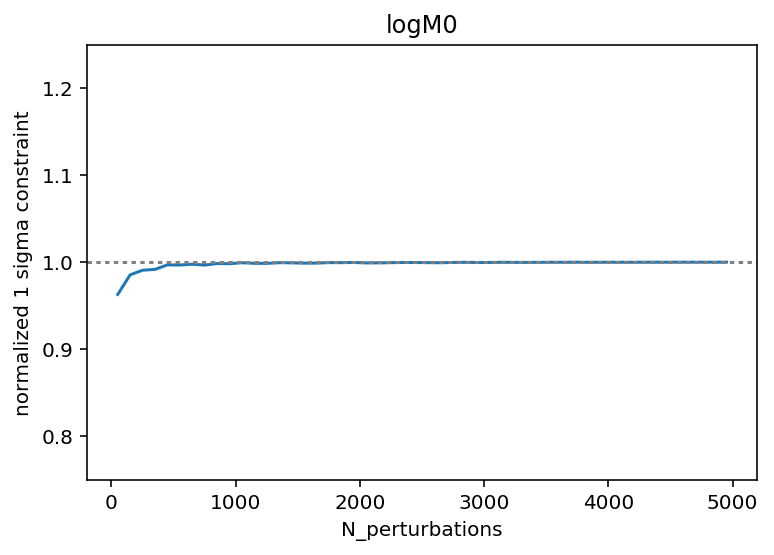

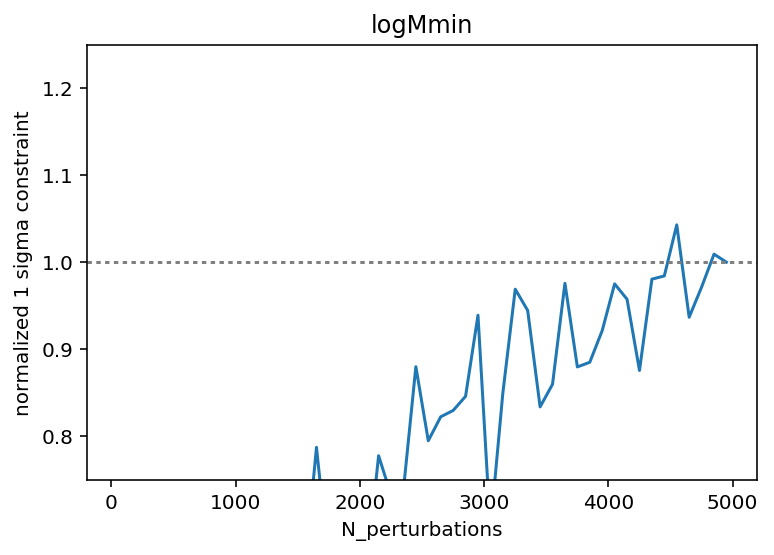

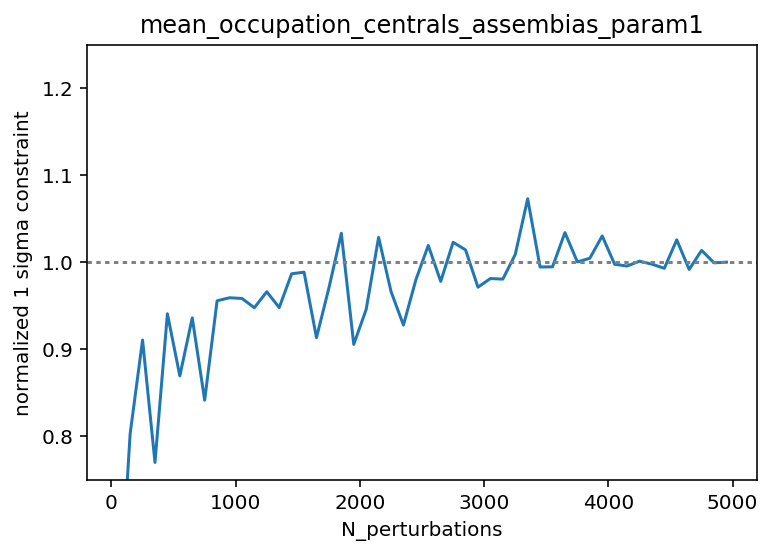

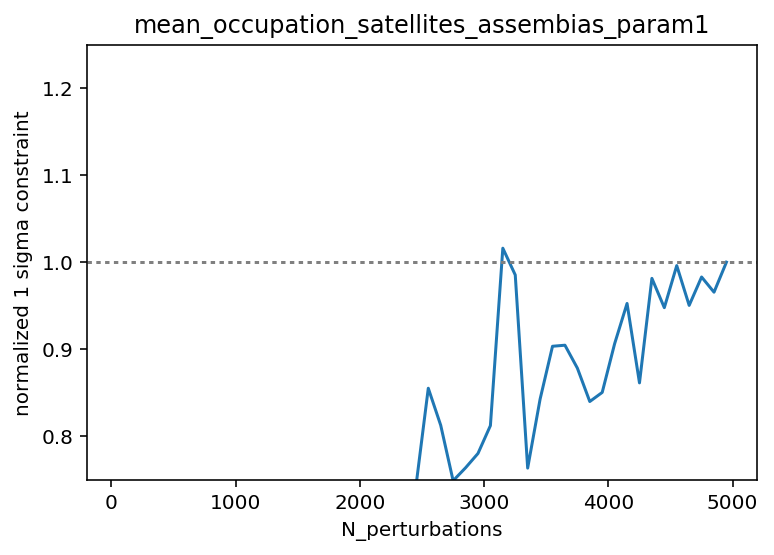

In [55]:
for i in range(7):
    plt.figure()
    plt.title(param_names[i])
    plt.xlabel('N_perturbations')
    plt.ylabel('normalized 1 sigma constraint')
    plt.plot(np.arange(50)*100+50,one_sigma_pp_vpf[:,i]/one_sigma_pp_vpf[-1,i])
    plt.axhline(1,linestyle=':',color='grey')
    plt.ylim((0.75,1.25))

In [56]:
one_sigma_pp_cic = np.zeros((50,7))
for i in range(50):
    print i
    one_sigma_pp_cic[i] = calc_1sigma_prior(calc_fisher(cutout_deriv[:,90:,i*2+1],cov[90:,90:]),3,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


## cic only

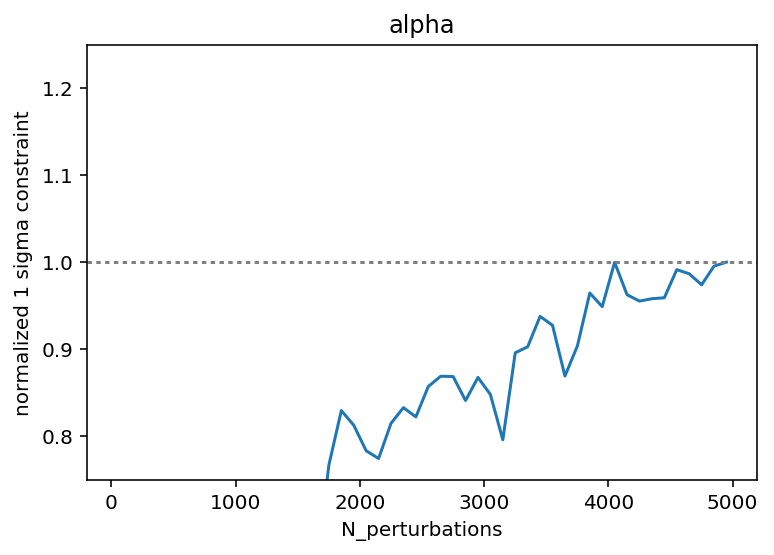

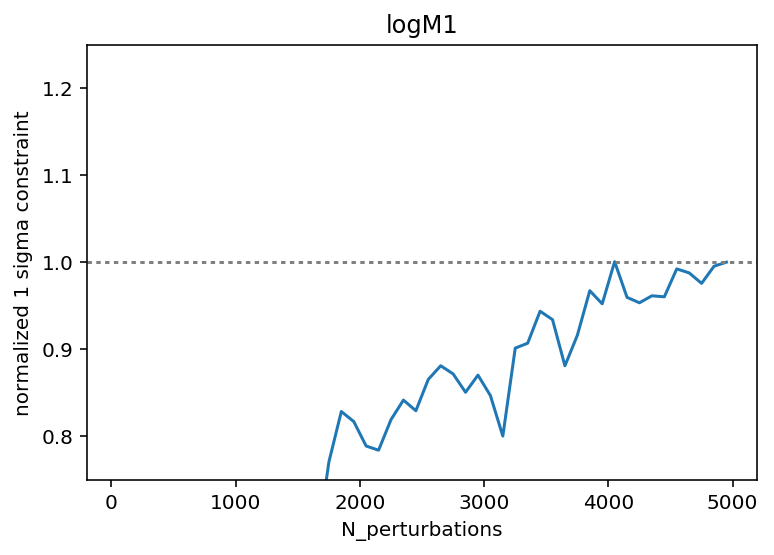

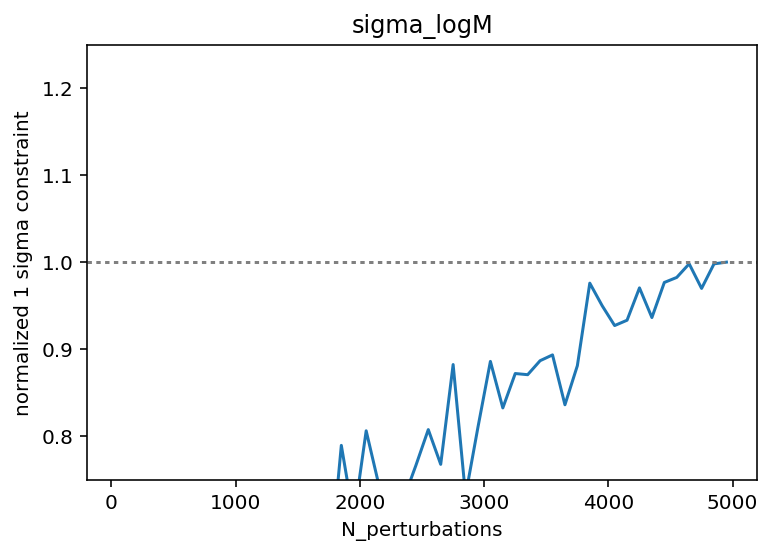

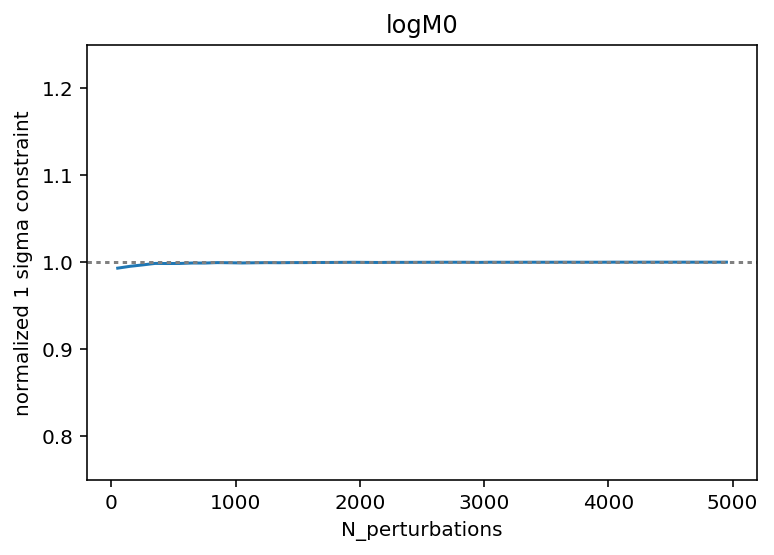

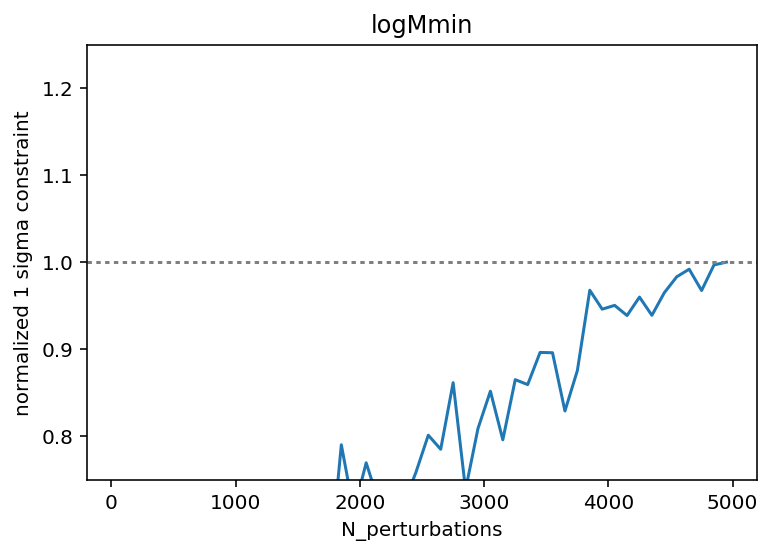

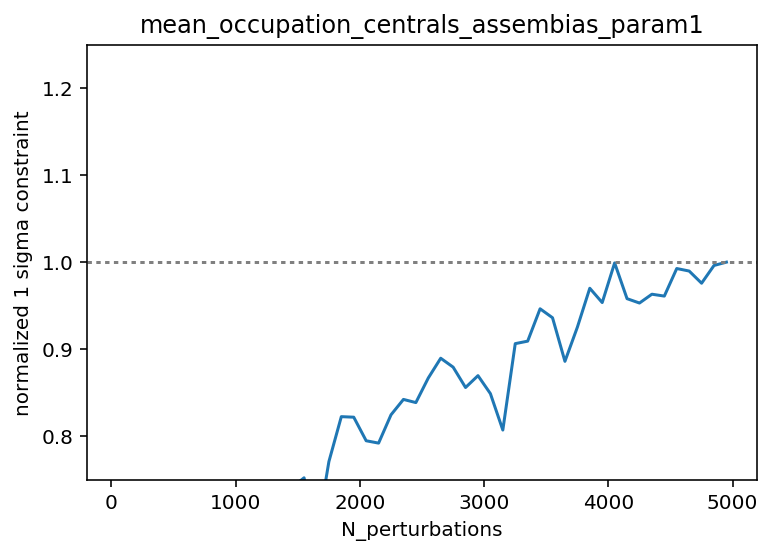

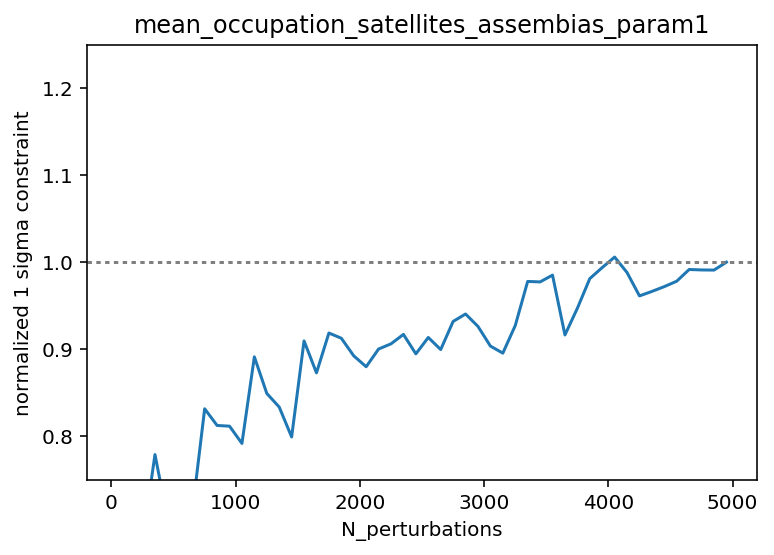

In [57]:
for i in range(7):
    plt.figure()
    plt.title(param_names[i])
    plt.xlabel('N_perturbations')
    plt.ylabel('normalized 1 sigma constraint')
    plt.plot(np.arange(50)*100+50,one_sigma_pp_cic[:,i]/one_sigma_pp_cic[-1,i])
    plt.axhline(1,linestyle=':',color='grey')
    plt.ylim((0.75,1.25))